# WeatherPy

In [130]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import datetime
from scipy.stats import linregress

# Import API key
from config import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [131]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to an our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

613

## Perform API Calls

In [132]:
url = 'http://api.openweathermap.org/data/2.5/weather?'
units = 'imperial'
query_url = f'{url}appid={weather_api_key}&units={units}&q='
counter = 1

citycity = []
lat = []
lng = []
max_temp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

weather_response = requests.get(query_url + city)
weather_json = weather_response.json()

print('********************************')
print('City Number and Name Information')
print('********************************')

for city in cities:
    try:
        weather_response = requests.get(query_url + city).json()
        citycity.append(weather_response['name'])
        lat.append(weather_response['coord']['lat'])
        lng.append(weather_response['coord']['lon'])
        max_temp.append(weather_response['main']['temp_max'])
        humidity.append(weather_response['main']['humidity'])
        cloudiness.append(weather_response['clouds']['all'])
        wind_speed.append(weather_response['wind']['speed'])
        country.append(weather_response['sys']['country'])
        date.append(weather_response['dt'])
        print(f'City Number - {counter} | City Name - {city}')
        counter = counter + 1
    except KeyError:
        print('City Not Found')

Found
City Number - 92 | City Name - riyadh
City Number - 93 | City Name - honningsvag
City Number - 94 | City Name - upernavik
City Number - 95 | City Name - longyearbyen
City Number - 96 | City Name - saldanha
City Number - 97 | City Name - linguere
City Number - 98 | City Name - vanimo
City Number - 99 | City Name - kununurra
City Number - 100 | City Name - marystown
City Number - 101 | City Name - sivas
City Number - 102 | City Name - geraldton
City Number - 103 | City Name - tiksi
City Number - 104 | City Name - boa vista
City Number - 105 | City Name - sur
City Not Found
City Number - 106 | City Name - bumbuna
City Number - 107 | City Name - narsaq
City Number - 108 | City Name - mayo
City Number - 109 | City Name - palana
City Number - 110 | City Name - usinsk
City Number - 111 | City Name - emerald
City Not Found
City Number - 112 | City Name - adeje
City Number - 113 | City Name - panaba
City Number - 114 | City Name - shelburne
City Number - 115 | City Name - san quintin
City

## Convert Raw Data to DataFrame

In [133]:
city_df = pd.DataFrame({
    'City': citycity,
    'Latitude': lat,
    'Longitude': lng,
    'Maximum Temperature': max_temp,
    'Humidity': humidity,
    'Cloudiness': cloudiness,
    'Wind Speed': wind_speed,
    'Country': country,
    'Date': pd.to_datetime(date, unit="s")
    })
city_df.head()

,City,Latitude,Longitude,Maximum Temperature,Humidity,Cloudiness,Wind Speed,Country,Date
0,Rome,43.2128,-75.4557,25.00,68,40,6.91,US,2021-02-10 18:19:53
1,Hobart,-42.8794,147.3294,53.01,87,0,10.36,AU,2021-02-10 18:23:00
2,Vaini,-21.2000,-175.2000,78.80,94,40,6.91,TO,2021-02-10 18:19:00
3,Ketchikan,55.3422,-131.6461,19.40,48,1,4.61,US,2021-02-10 18:13:24
4,Kavos,38.8268,22.8322,57.99,72,51,1.99,GR,2021-02-10 18:23:00


In [134]:
# Push data to CSV File
city_df.to_csv('Cities Compiled.csv')

In [135]:
# Defined variables for useful information to plot
lats = city_df['Latitude']
temps = city_df['Maximum Temperature']
hums = city_df['Humidity']
clouds = city_df['Cloudiness']
winds = city_df['Wind Speed']

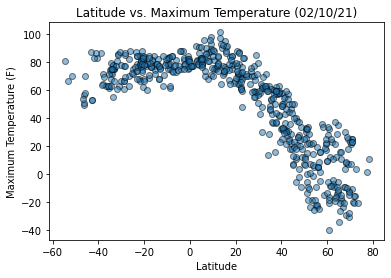

In [136]:
# Latitude vs. Temperature Plot
plt.scatter(lats, temps, edgecolor='black', linewidths=1, marker='o', alpha=.5)
plt.title("Latitude vs. Maximum Temperature (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Maximum Temperature (F)')
plt.savefig('graphs/LatitudeMaxTempScatterPlot.png')

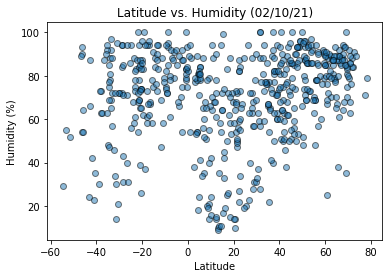

In [137]:
plt.scatter(lats, hums, edgecolor='black', linewidths=1, marker='o', alpha=.5)
plt.title("Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.savefig('graphs/LatitudeHumidityScatterPlot.png')

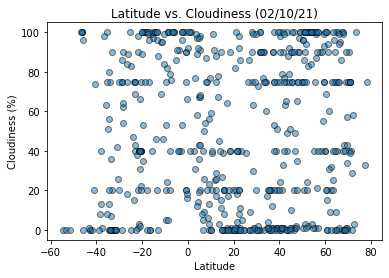

In [138]:
plt.scatter(lats, clouds, edgecolor='black', linewidths=1, marker='o', alpha=.5)
plt.title("Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.savefig('graphs/LatitudeCloudinessScatterPlot.png')

## Latitude vs. Wind Speed Plot

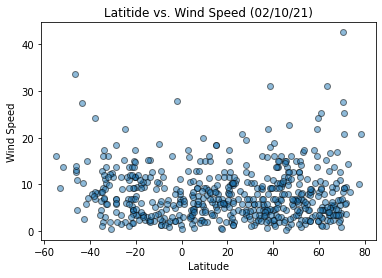

In [139]:
plt.scatter(lats, winds, edgecolor='black', linewidths=1, marker='o', alpha=.5)
plt.title("Latitide vs. Wind Speed (%s)" % time.strftime("%x"))
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.savefig('graphs/LatitudeWindSpeedScatterPlot.png')

## Linear Regression

In [140]:
# Create function for calling linear regression on plots
def lin_reg(x_values, y_values, title, text_coordinates):

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values,y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,4)) + "x + " + str(round(intercept,4))

    plt.scatter(x_values, y_values, edgecolor='black', linewidths=1, marker='o', alpha=.5)
    plt.plot(x_values, regress_values, 'r-')
    plt.annotate(line_eq,text_coordinates,fontsize=15,color='black')
    plt.xlabel('Latitude')
    plt.ylabel(title)
    print(f"The r-value is: {rvalue**2}")
    plt.show()

In [141]:
# Create Northern and Southern Hemisphere DataFrames
n_hemi_df = city_df[city_df['Latitude'] >= 0]
s_hemi_df = city_df[city_df['Latitude'] <= 0]

The r-value is: 0.7968790530260648


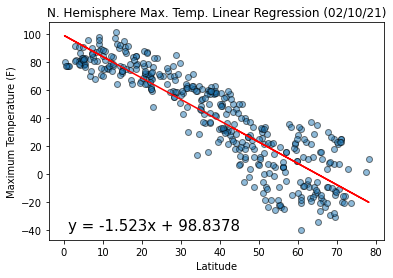

<Figure size 432x288 with 0 Axes>

In [142]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Maximum Temperature']
plt.title("N. Hemisphere Max. Temp. Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Maximum Temperature (F)', (1,-40))
plt.savefig('graphs/NorthernMaxTempLatitudeLinearRegression.png')

The r-value is: 0.16838437550423804


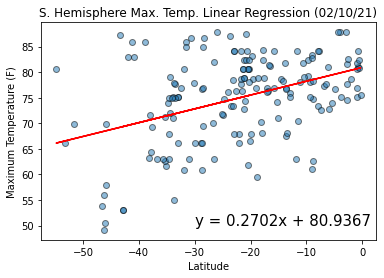

<Figure size 432x288 with 0 Axes>

In [143]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Maximum Temperature']
plt.title("S. Hemisphere Max. Temp. Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Maximum Temperature (F)', (-30,50))
plt.savefig('graphs/SouthernMaxTempLatitudeLinearRegression.png')

The r-value is: 0.18776660170708342


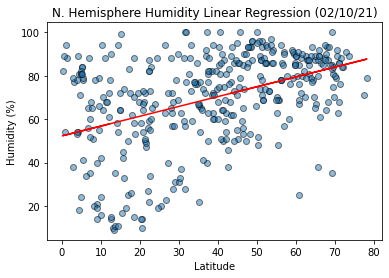

<Figure size 432x288 with 0 Axes>

In [144]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Humidity']
plt.title("N. Hemisphere Humidity Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Humidity (%)', (0,0))
plt.savefig('graphs/NorthernHumidityLatitudeLinearRegression.png')

The r-value is: 0.12572420053826633


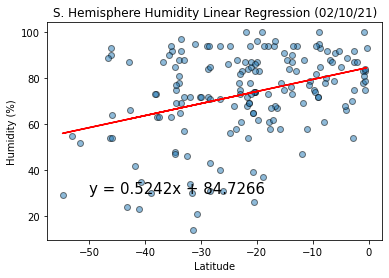

<Figure size 432x288 with 0 Axes>

In [145]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Humidity']
plt.title("S. Hemisphere Humidity Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Humidity (%)', (-50,30))
plt.savefig('graphs/SouthernHumidityLatitudeLinearRegression.png')

The r-value is: 0.02680993317624425


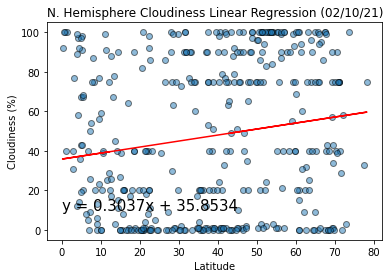

<Figure size 432x288 with 0 Axes>

In [146]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Cloudiness']
plt.title("N. Hemisphere Cloudiness Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Cloudiness (%)', (0,10))
plt.savefig('graphs/NorthernCloudinessLatitudeLinearRegression.png')

The r-value is: 0.11234868293905284


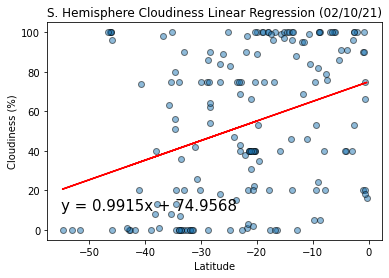

<Figure size 432x288 with 0 Axes>

In [147]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Cloudiness']
plt.title("S. Hemisphere Cloudiness Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Cloudiness (%)', (-55,10))
plt.savefig('graphs/SouthernCloudinessLatitudeLinearRegression.png')

The r-value is: 0.009700353241407899


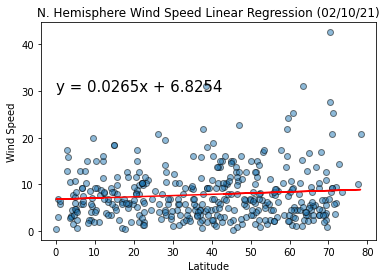

<Figure size 432x288 with 0 Axes>

In [148]:
x_values = n_hemi_df['Latitude']
y_values = n_hemi_df['Wind Speed']
plt.title("N. Hemisphere Wind Speed Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Wind Speed', (0,30))
plt.savefig('graphs/NorthernWindSpeedLatitudeLinearRegression.png')

The r-value is: 0.08570454168945131


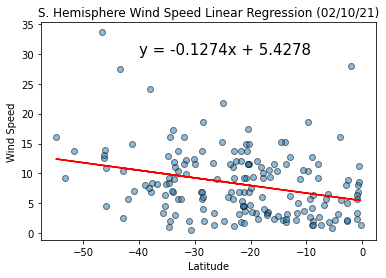

<Figure size 432x288 with 0 Axes>

In [149]:
x_values = s_hemi_df['Latitude']
y_values = s_hemi_df['Wind Speed']
plt.title("S. Hemisphere Wind Speed Linear Regression (%s)" % time.strftime("%x"))
lin_reg(x_values, y_values, 'Wind Speed', (-40,30))
plt.savefig('graphs/SouthernWindSpeedLatitudeLinearRegression.png')